 ╔══<i><b>Alai-DeepLearning</b></i>════════════════════════════╗
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 9. CNN Basis**
# Section 3. 고차원에서의 합성곱 연산

### _Objective_
1. 대부분의 합성곱 연산은 4차원의 데이터를 다룹니다. 이를 어떻게 연산하는 지를 배워봅니다. <br>
2. 합성곱 연산의 연산량을 줄여주는 풀링 연산에 대해 배워봅니다.<br> 
  
╚═════════════════════════════════════════╝

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

<br><br>

# \[ 1. 3, 4차원 데이터의 합성곱 연산 \]

----

----

> *이전까지는 2차원 이미지를 다루는 합성곱 연산을 살펴봤습니다.*<br>
> *하지만 대부분의 데이터는 색상이라는 Channel 정보가 있어, 3차원 데이터로 구성됩니다.*<br>
> *그리고 연산을 진행할 때는 대부분 배치 단위로, 복수개의 데이터를 한번에 처리하는 식으로 진행됩니다.*<br>


## 1. 하나의 필터로 3차원 데이터 합성곱 진행하기
---

* 채널 방향으로 입력 데이터와 필터의 합성곱 연산을 수행하고, 그 결과 데이터를 더해 하나의 출력값으로 표현합니다.
* 아래의 3차원 데이터를 통해, 합성곱 연산이 어떤 식으로 진행되는지 살펴보도록 하겠습니다.

### (1) 3차원 데이터 구성하기

아래와 같이 3차원으로 구성된 입력 행렬을 구성하였습니다.<br>

In [0]:
in0 = np.array([
    [1,4,2,0],
    [2,3,1,0],
    [3,1,2,3],
    [4,3,2,1]
])
in1 = np.array([
    [1,7,2,1],
    [3,2,1,9],
    [0,1,5,1],
    [4,6,2,4]
])
in2 = np.array([
    [1,5,2,1],
    [3,2,1,9],
    [0,1,3,1],
    [4,6,2,7]
])
inputs = np.stack(#fix me#)
print("입력값의 형태 (H, W, C) :({},{},{})".format(*inputs.shape))

입력값의 형태 (H, W, C) :(4,4,3)


### (2) Filter 구성하기

여기서 중요한 것은 입력값의 채널 수(C)와 필터의 채널 수(C)가 동일해야 한다는 것입니다.<br>
입력값의 채널에 따라 채널 별 필터가 존재하고, 각 채널 별로 합성곱 연산을 진행한 후, 하나의 값으로 출력됩니다.<br>

In [0]:
f0 = np.array([
    [2,0,1],
    [0,1,2],
    [1,0,2]
])
f1 = np.array([
    [0,1,3],
    [2,1,3],
    [4,1,2]
])
f2 = np.array([
    [3,2,1],
    [2,2,3],
    [0,0,1]
])
filter = np.stack(#fix me#)
print("Filter의 형태 (H, W, C) : ({},{},{})".format(*filter.shape))

### (3) 합성곱 연산 진행하기

padding은 valid, stride은 1로 두고 연산하면 아래와 같습니다.

In [0]:
outputs = # fix me # 
for i in range(#fix me#):
    for j in range(#fix me#):
        result = #fix me# 
        outputs[#fix me#] = result
        print("({},{}) 번째 값 : {}".format(i,j,result))
outputs

(0,0) 번째 값 : 82
(0,1) 번째 값 : 118
(1,0) 번째 값 : 92
(1,1) 번째 값 : 126


array([[ 82., 118.],
       [ 92., 126.]])

### (4) 블록으로 시각화하기

블록으로 시각화한다면, 아래와 같이 나타낼 수 있습니다.

![Imgur](https://i.imgur.com/uNUYhhx.png)

* 입력 특징맵의 형태 : $(h_{in},w_{in},c_{in})$
* 필터의 형태 : $(h_f,w_f,c_{in})$
* 출력 특징맵의 형태 : $(h_{out},w_{out})$

출력의 형태는 이전에 배운 것과 마찬가지로<br>
필터의 크기, Stride, padding으로 결정됩니다.

## 2. 복수개의 필터로 3차원 데이터 합성곱 진행하기
---

* 하나의 Filter은 하나의 특징을 추출할 수 있습니다. <br>
* 영상을 파악하기 위해서는 복수개의 특징을 함께 추출해, 판단해야 합니다.<br>
* 복수개의 필터는 아래와 같이 진행됩니다.

### (1) Filter 구성하기

하나의 필터는 $(h_f,w_f,c_{in})$의 형태로 구성됩니다.<br>
이러한 필터들을 복수개로 구성해 쌓으면 아래와 같습니다.

In [0]:
filter_1 = np.array([
    [[2,0,1],[0,1,2],[1,0,2]],
    [[0,1,3],[2,1,3],[4,1,2]],
    [[3,2,1],[2,2,3],[0,0,1]]])
filter_2 = np.array([
    [[4,0,1],[0,0,4],[0,3,2]],
    [[6,1,2],[3,5,1],[2,3,2]],
    [[1,4,1],[1,3,1],[2,1,0]]])

# filter 의 최종 shape 는 (N, H, W, C 가 되어야 합니다.
filters = np.stack([#fix me #],axis=0)
print("Filter의 형태 (N, H, W, C) : ({},{},{},{})".format(*filters.shape))

Filter의 형태 (N, H, W, C) : (2,3,3,3)


In [0]:
outputs = #fix me#
for i in range(#fix me#):
    for j in range(#fix me#):
        for k in range(#fix me#):
            result = #fix me#
            outputs[#fix me#] = result
outputs

array([[[ 81., 115.],
        [ 64., 204.]],

       [[ 89., 151.],
        [ 76., 167.]]])

### (2) 블록으로 시각화하기

블록으로 시각화한다면, 아래와 같이 나타낼 수 있습니다.


![Imgur](https://i.imgur.com/ONua9B4.png)




* 입력 특징맵의 형태 : $(h_{in},w_{in},c_{in})$
* 필터의 형태 : $(n_f,h_f,w_f,c_{in})$
* 출력 특징맵의 형태 : $(h_{out},w_{out},n_f)$

## 3. 복수개의 필터로 배치단위 데이터 합성곱 진행하기
---

* 신경망을 학습시킬 때에는 단일 데이터보다 보통 배치 단위로 처리합니다.<br>
* 배치 단위로 진행될 경우 어떤 식으로 데이터의 형태가 변화하는지를 파악하는데 초점을 두도록 하겠습니다.

![Imgur](https://i.imgur.com/BlvHzCu.png)

* 입력 특징맵의 형태 : $(n_{batch}, h_{in},w_{in},c_{in})$
* 필터의 형태 : $(n_f,h_f,w_f,c_{in})$
* 출력 특징맵의 형태 : $(n_{batch}, h_{out},w_{out},n_f)$

## 4. tf.nn.conv2d 을 사용해 3차원 영상 convolution 연산 수행하기 
---

tf.nn.conv2d 을 이용해 어떻게 convoluiton 연산을 수행하는지 알아봅니다. 



In [0]:
import numpy as np
import tensorflow as tf

# sample image 
sample = np.ones(shape=[10, 10], dtype=np.float32)
tf_sample = #fix me # 

# sample kernel 
sample_kernel = np.ones(shape=[3, 3], dtype=np.float32)
tf_kernel = #fix me #

# convolution 수행 
output = tf.nn.conv2d(#fix me#)

output_1 = tf.nn.conv2d(#fix me# )

# 결과 확인 
sess = tf.Session()
output_, output_1_ = sess.run([output, output_1])
print(output_.shape, output_1_.shape)

<br><br>

# \[ 2. 풀링 연산이란 \]

----

----

> *풀링은 세로,가로 방향의 공간을 줄이는 연산입니다.* <br>


## 1. 2차원 데이터로 풀링 연산 수행하기
---

* 아래의 2차원 데이터를 통해, 풀링 연산이 어떤 식으로 진행되는지 살펴보도록 하겠습니다.

### (1) 2차원 데이터 구성하기

In [0]:
values = np.array([
    [1,3,2,1],
    [2,9,1,1],
    [1,3,2,3],
    [2,6,1,2]
])
values

array([[1, 3, 2, 1],
       [2, 9, 1, 1],
       [1, 3, 2, 3],
       [2, 6, 1, 2]])

### (2) 풀링 연산 수행하기

아래는 2x2 Max Pooling을 stride 2로 처리하는 결과입니다.<br> 
최대 풀링은 합성곱 연산와 같이, 특정 패치 단위로 입력값을 스캔하면서<br>
처리하게 됩니다.

In [0]:
filters = 2
strides = 2

result = np.zeros([#fix me #]) # pooling 후 결과물의 shape 을 적어주세요 
for i in range(#fix me #):
    for j in range(#fix me#):
        patch = values[#fix me#]
        result[#fix me#] = #fix me# 
result

array([[9., 2.],
       [6., 3.]])

Pooling Layer는 이미지에서 Sampling하는 것과 효과와 동일합니다.<br>
이렇게 될 경우, 이미지가 약간 이동하더라도 신경망이 영향을 덜 받게 됩니다. <br>

이는 위치 불변성(Location Invariance)이라는 이슈로,<br> 
모델이 견고하게 되는데에 중요한 특성 중 하나입니다.

## 2. 3차원 데이터로 풀링 연산 수행하기
---

* 합성곱 연산과 마찬가지로, 각 채널 별로 독립적으로 풀링 연산이 수행되게 됩니다.<br>

### (1) 3차원 데이터 구성하기

In [0]:
in0 = np.array([
    [1,4,2,0],
    [2,3,1,0],
    [3,1,2,3],
    [4,3,2,1]
])
in1 = np.array([
    [1,7,2,1],
    [3,2,1,9],
    [0,1,5,1],
    [4,6,2,4]
])
in2 = np.array([
    [1,5,2,1],
    [3,2,1,9],
    [0,1,3,1],
    [4,6,2,7]
])
inputs = np.stack([#fix me#],axis=-1)
print("입력값의 형태 (H, W, C) :({},{},{})".format(*inputs.shape))

입력값의 형태 (H, W, C) :(4,4,3)


In [0]:
filters = 2
strides = 2
result = np.zeros(#fix me#)
for i in range(#fix me #):
    for j in range(#fix me #):
        for k in range(#fix me#):
            patch = inputs[#fix me#]
            result[#fix me #] = #fix me#

print("출력값의 형태 (H, W, C) :({},{},{})".format(*result.shape))
result

출력값의 형태 (H, W, C) :(2,2,3)


array([[[4., 7., 5.],
        [2., 9., 9.]],

       [[4., 6., 6.],
        [3., 5., 7.]]])

합성곱 신경망에서는 풀링 층을 사용해 표현의 크기를 줄임으로써 
1. 계산 속도를 줄이고,
2. 메모리의 사용량을 줄이며,
3. 특징을 좀 더 안정적으로 검출할 수 있도록 합니다.<br>


## 4. tf.nn.conv2d 을 사용해 3차원 영상 Pooling  수행하기 
---

tf.nn.conv2d 을 이용해 어떻게 convoluiton 연산을 수행하는지 알아봅니다. 

tensorflow 에서 제공하는 pooling 은 2가지 종류가 있습니다. 

- max pooling : [tf.nn.max_pool](https://www.tensorflow.org/api_docs/python/tf/nn/max_pool)
- average pooling : [tf.nn.avg_pool](https://www.tensorflow.org/api_docs/python/tf/nn/avg_pool)



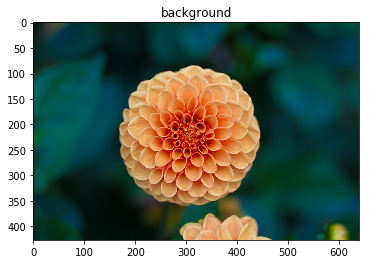

In [0]:
from sklearn.datasets import load_sample_images
dataset = load_sample_images()    
first_img_data = dataset.images[1] 

plt.imshow(first_img_data)
plt.title('background')
plt.show()

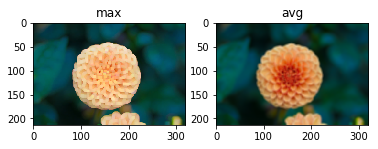

In [0]:
# normalize
first_img_data = #fix me #
# first_img_data to tensor
tf_dataset = tf.constant(#fix me)

# pooling kernel shape 10, 10
# pooling stride shape 2, 2
    
maxpool_output = #fix me#
avgpool_output = #fix me#

sess = tf.Session()
maxpool_output_, avgpool_output_  = sess.run(#fix me #)

fig, axes = plt.subplots(1,2)

# axes0 : max pooling output , axes1 : max pooling output
axes[0].imshow(#fix me#)
axes[0].set_title('max')
axes[1].imshow(#fix me #)
axes[1].set_title('avg')
plt.show()

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.<br>
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/04/25

---